### Capstone Project 1
Create a short document (1-2 pages) in your github describing the data wrangling steps that you undertook to clean your capstone project data set. What kind of cleaning steps did you perform? How did you deal with missing values, if any? Were there outliers, and how did you decide to handle them?

The dataset consists of 5819079 rows and 31 columns. When I took a closer look at the data, I noticed that several features have Null values. I performed data wrangling by Renaming, Sorting reordering, duplicating data, addressing missing or invalid data, and Filtering to the desired subset of data. I used the isnull() function to detect missing values. And The dropna() function to remove missing values.

In [81]:
import datetime,scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Gathering Data

In [82]:
data = pd.read_csv("flights.csv")

/Users/lilie/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [83]:
data=data.sample(n=100000)

In [84]:
airport = pd.read_csv('airports.csv')
airlines = pd.read_csv('airlines.csv')

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 5304822 to 837005
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 100000 non-null  int64  
 1   MONTH                100000 non-null  int64  
 2   DAY                  100000 non-null  int64  
 3   DAY_OF_WEEK          100000 non-null  int64  
 4   AIRLINE              100000 non-null  object 
 5   FLIGHT_NUMBER        100000 non-null  int64  
 6   TAIL_NUMBER          99749 non-null   object 
 7   ORIGIN_AIRPORT       100000 non-null  object 
 8   DESTINATION_AIRPORT  100000 non-null  object 
 9   SCHEDULED_DEPARTURE  100000 non-null  int64  
 10  DEPARTURE_TIME       98496 non-null   float64
 11  DEPARTURE_DELAY      98496 non-null   float64
 12  TAXI_OUT             98453 non-null   float64
 13  WHEELS_OFF           98453 non-null   float64
 14  SCHEDULED_TIME       100000 non-null  float64
 15  ELAPSED_TIM

## Data Insights

In [80]:
data.shape

(100000, 31)

The dataset comprises of 5819079 observations and 31chracteriestics
out of which one is dependent variable and rest 30 are independent variables.

### Summary Statistics

In [7]:
data.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,98567.000000,98567.000000,98519.000000,98519.000000,...,100000.00000,98463.000000,98262.000000,100000.000000,100000.000000,18298.000000,18298.000000,18298.000000,18298.000000,18298.000000
mean,2015.0,6.518270,15.752430,3.928900,2181.275680,1330.654150,1335.983940,9.388061,16.131711,1357.680153,...,1493.96818,1476.977636,4.448088,0.002410,0.014970,13.657777,0.077549,18.617445,23.704776,2.929555
std,0.0,3.411504,8.791039,2.001436,1759.683847,484.068943,496.750957,36.531606,9.073852,498.409708,...,507.48133,526.458553,38.750842,0.049033,0.121433,26.946926,2.035094,47.052713,43.143930,20.173476
min,2015.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-40.000000,1.000000,1.000000,...,1.00000,1.000000,-74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,4.000000,8.000000,2.000000,735.000000,918.000000,922.000000,-5.000000,11.000000,936.000000,...,1109.00000,1057.000000,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,7.000000,16.000000,4.000000,1702.000000,1326.000000,1332.000000,-2.000000,14.000000,1344.000000,...,1520.00000,1513.000000,-5.000000,0.000000,0.000000,2.000000,0.000000,2.000000,3.000000,0.000000
75%,2015.0,9.000000,23.000000,6.000000,3247.000000,1730.000000,1740.000000,7.000000,19.000000,1754.000000,...,1918.00000,1916.000000,8.000000,0.000000,0.000000,18.000000,0.000000,19.000000,29.000000,0.000000
max,2015.0,12.000000,31.000000,7.000000,7438.000000,2359.000000,2400.000000,1076.000000,180.000000,2400.000000,...,2359.00000,2400.000000,1090.000000,1.000000,1.000000,390.000000,148.000000,1076.000000,635.000000,748.000000


In [8]:
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
3897267,2015,8,30,7,AA,772,N200UU,SJU,PHL,1510,...,1853.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2835037,2015,6,27,6,WN,3161,N7710A,BOS,STL,1645,...,2040.0,110.0,0,0,NaN,0.0,0.0,13.0,97.0,0.0
3245709,2015,7,22,3,UA,1415,N35271,SFO,PDX,1057,...,1230.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2645777,2015,6,16,2,EV,5449,N371CA,DTW,ELM,1350,...,1447.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5365777,2015,12,2,3,EV,4876,N166PQ,DTW,ORF,1541,...,1730.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


From the above table it is clear that data is not properly organised and date is given seperated and many columns have unnecessary data not useful for visualization for which it is required that we clean the data and take only those columns which is of our use.

### Data Wrangling
I used the isnull() function to Identify missing values

In [9]:
airport.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [10]:
airport = airport.dropna(subset = ['LATITUDE','LONGITUDE'])

In [11]:
airport.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     0
LONGITUDE    0
dtype: int64

In [12]:
airport.head(10)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


In [77]:
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [78]:
Data_NULL = data.isnull().sum()*100/data.shape[0]
Data_NULL

YEAR                    0.000
MONTH                   0.000
DAY                     0.000
DAY_OF_WEEK             0.000
AIRLINE                 0.000
FLIGHT_NUMBER           0.000
TAIL_NUMBER             0.251
ORIGIN_AIRPORT          0.000
DESTINATION_AIRPORT     0.000
SCHEDULED_DEPARTURE     0.000
DEPARTURE_TIME          1.433
DEPARTURE_DELAY         1.433
TAXI_OUT                1.481
WHEELS_OFF              1.481
SCHEDULED_TIME          0.000
ELAPSED_TIME            1.738
AIR_TIME                1.738
DISTANCE                0.000
WHEELS_ON               1.537
TAXI_IN                 1.537
SCHEDULED_ARRIVAL       0.000
ARRIVAL_TIME            1.537
ARRIVAL_DELAY           1.738
DIVERTED                0.000
CANCELLED               0.000
CANCELLATION_REASON    98.503
AIR_SYSTEM_DELAY       81.702
SECURITY_DELAY         81.702
AIRLINE_DELAY          81.702
LATE_AIRCRAFT_DELAY    81.702
WEATHER_DELAY          81.702
dtype: float64

We can see that 98% of the values in Cancellation reason column are null for which it is of less use while predicting Delays. Some other columns include 81.7% in Air System Delay, Security Delay, Airline Delay, Weather Delay etc. So I am going to create two Dataset which is having no null values. First, I am removing all the null values irrespective of different types of Delays. Second, I am going to take the data set with respect to different types of delays. The first Dataset is named as Flights and the other one is named as Flight_Delays.

In [ ]:
# Dropping of subset of null values
data1 = data.dropna(subset = ["TAIL_NUMBER",'DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME',
             'ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY'])

In [16]:
data1.shape

(98262, 31)

data1.isnull().sum()

In [18]:
# Creating Dataset with different Types of Delays
data11 = data1.dropna(subset = ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'])
data11 = data11.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER','SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_TIME',
                     'SCHEDULED_ARRIVAL','ARRIVAL_TIME','DIVERTED','CANCELLED','CANCELLATION_REASON','FLIGHT_NUMBER','WHEELS_OFF',
                     'WHEELS_ON','AIR_TIME'],axis = 1)

In [19]:
data11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18298 entries, 2835037 to 692726
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AIRLINE              18298 non-null  object 
 1   ORIGIN_AIRPORT       18298 non-null  object 
 2   DESTINATION_AIRPORT  18298 non-null  object 
 3   DEPARTURE_DELAY      18298 non-null  float64
 4   TAXI_OUT             18298 non-null  float64
 5   ELAPSED_TIME         18298 non-null  float64
 6   DISTANCE             18298 non-null  int64  
 7   TAXI_IN              18298 non-null  float64
 8   ARRIVAL_DELAY        18298 non-null  float64
 9   AIR_SYSTEM_DELAY     18298 non-null  float64
 10  SECURITY_DELAY       18298 non-null  float64
 11  AIRLINE_DELAY        18298 non-null  float64
 12  LATE_AIRCRAFT_DELAY  18298 non-null  float64
 13  WEATHER_DELAY        18298 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 2.1+ MB


In [20]:
# The other Dataset
Flight_Delays = data11

In [21]:
# Creating Dataset by removing null values by not focussing fully on different types of Delays
data2 = data1.drop(['CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
                    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis = 1)

In [22]:
data2.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64

In [23]:
data2.shape

(98262, 25)

In [24]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98262 entries, 3897267 to 692726
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 98262 non-null  int64  
 1   MONTH                98262 non-null  int64  
 2   DAY                  98262 non-null  int64  
 3   DAY_OF_WEEK          98262 non-null  int64  
 4   AIRLINE              98262 non-null  object 
 5   FLIGHT_NUMBER        98262 non-null  int64  
 6   TAIL_NUMBER          98262 non-null  object 
 7   ORIGIN_AIRPORT       98262 non-null  object 
 8   DESTINATION_AIRPORT  98262 non-null  object 
 9   SCHEDULED_DEPARTURE  98262 non-null  int64  
 10  DEPARTURE_TIME       98262 non-null  float64
 11  DEPARTURE_DELAY      98262 non-null  float64
 12  TAXI_OUT             98262 non-null  float64
 13  WHEELS_OFF           98262 non-null  float64
 14  SCHEDULED_TIME       98262 non-null  float64
 15  ELAPSED_TIME         98262 no

Data has only float and integer values
No variable column has null/missing values

In [25]:
data2.DEPARTURE_TIME.isnull().sum()

0

In [26]:
data2.DEPARTURE_TIME.describe()

count    98262.000000
mean      1335.831298
std        496.653559
min          1.000000
25%        922.000000
50%       1331.000000
75%       1740.000000
max       2400.000000
Name: DEPARTURE_TIME, dtype: float64

In [27]:
data2.DEPARTURE_TIME.describe()

count    98262.000000
mean      1335.831298
std        496.653559
min          1.000000
25%        922.000000
50%       1331.000000
75%       1740.000000
max       2400.000000
Name: DEPARTURE_TIME, dtype: float64

###   
The departure time above is not very much informative so i am going to change it in the datetime format so that we get a better idea of the time.

In [28]:
# Creating a function to change the way of representation of time in the column
def Format_Hourmin(hours):
        if hours == 2400:
            hours = 0
        else:
            hours = "{0:04d}".format(int(hours))
            Hourmin = datetime.time(int(hours[0:2]), int(hours[2:4]))
            return Hourmin

In [29]:
data2['Actual_Departure'] =data1['DEPARTURE_TIME'].apply(Format_Hourmin)


In [30]:
data2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'Actual_Departure'],
      dtype='object')

In [31]:
# Creating Date in the Datetime format
data2['Date'] = pd.to_datetime(data2[['YEAR','MONTH','DAY']])


In [32]:
data2['Day'] = data2['Date']

In [33]:
# Applying the function to required variables in the dataset
data2['Actual_Departure'] =data1['DEPARTURE_TIME'].apply(Format_Hourmin)
data2['Scheduled_Arrival'] =data1['SCHEDULED_ARRIVAL'].apply(Format_Hourmin)
data2['Scheduled_Departure'] =data1['SCHEDULED_DEPARTURE'].apply(Format_Hourmin)
data2['Actual_Arrival'] =data1['ARRIVAL_TIME'].apply(Format_Hourmin)

# Merging of  3 data sets

Since there are three dataset it is required to merge all the three data set so that we can use it during the visualization in a proper way.

In [34]:
# Merging on AIRLINE and IATA_CODE
data2 = data2.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

In [35]:
data2 = data2.drop(['AIRLINE_x','IATA_CODE'], axis=1)

In [36]:
data2 = data2.rename(columns={"AIRLINE_y":"AIRLINE"})

In [37]:
data2 = data2.merge(airport, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')
data2 = data2.merge(airport, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')

In [38]:
data2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'Actual_Departure', 'Date', 'Day',
       'Scheduled_Arrival', 'Scheduled_Departure', 'Actual_Arrival', 'AIRLINE',
       'IATA_CODE_x', 'AIRPORT_x', 'CITY_x', 'STATE_x', 'COUNTRY_x',
       'LATITUDE_x', 'LONGITUDE_x', 'IATA_CODE_y', 'AIRPORT_y', 'CITY_y',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y'],
      dtype='object')

In [39]:
data2 = data2.drop(['LATITUDE_x', 'LONGITUDE_x',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y','STATE_x', 'COUNTRY_x'], axis=1)

In [40]:
data2 = data2.rename(columns={'IATA_CODE_x':'Org_Airport_Code','AIRPORT_x':'Org_Airport_Name','CITY_x':'Origin_city',
                             'IATA_CODE_y':'Dest_Airport_Code','AIRPORT_y':'Dest_Airport_Name','CITY_y':'Destination_city'})

In [41]:
data2.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,Scheduled_Arrival,Scheduled_Departure,Actual_Arrival,AIRLINE,Org_Airport_Code,Org_Airport_Name,Origin_city,Dest_Airport_Code,Dest_Airport_Name,Destination_city
0,2015,8,30,7,772,N200UU,SJU,PHL,1510,1505.0,...,19:03:00,15:10:00,18:53:00,American Airlines Inc.,SJU,Luis Muñoz Marín International Airport,San Juan,PHL,Philadelphia International Airport,Philadelphia
1,2015,7,31,5,678,N201UU,SJU,PHL,1248,1251.0,...,16:50:00,12:48:00,16:34:00,American Airlines Inc.,SJU,Luis Muñoz Marín International Airport,San Juan,PHL,Philadelphia International Airport,Philadelphia
2,2015,8,9,7,2007,N102UW,SJU,PHL,1820,1828.0,...,22:15:00,18:20:00,22:07:00,American Airlines Inc.,SJU,Luis Muñoz Marín International Airport,San Juan,PHL,Philadelphia International Airport,Philadelphia
3,2015,12,25,5,748,N971UY,SJU,PHL,530,526.0,...,08:33:00,05:30:00,08:23:00,American Airlines Inc.,SJU,Luis Muñoz Marín International Airport,San Juan,PHL,Philadelphia International Airport,Philadelphia
4,2015,12,18,5,838,N203UW,SJU,PHL,1815,1809.0,...,21:14:00,18:15:00,21:02:00,American Airlines Inc.,SJU,Luis Muñoz Marín International Airport,San Juan,PHL,Philadelphia International Airport,Philadelphia


In [42]:
# I am taking the required data into Account for visualization and the Analysis
ReqdData = pd.DataFrame(data2[['AIRLINE','Org_Airport_Name','Origin_city',
                               'Dest_Airport_Name','Destination_city','ORIGIN_AIRPORT',
                               'DESTINATION_AIRPORT','DISTANCE','Actual_Departure','Date','Day',
                               'Scheduled_Departure','DEPARTURE_DELAY','Actual_Arrival','Scheduled_Arrival','ARRIVAL_DELAY',
                              'SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','TAXI_IN','TAXI_OUT','DIVERTED',]])

In [43]:
ReqdData = ReqdData.dropna(subset = ['Actual_Departure','Actual_Arrival'])

In [44]:
# Cleaned Dataset for visualization and Analysis
Flights = ReqdData
Flights.describe()

,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
count,89719.000000,89719.000000,89719.000000,89719.000000,89719.000000,89719.000000,89719.000000,89719.000000,89719.0
mean,824.982178,9.727037,4.922079,142.045163,137.240206,113.681662,7.411362,16.147182,0.0
std,610.061474,37.030728,39.446895,75.521339,74.402763,72.456171,5.492555,9.133863,0.0
min,31.000000,-29.000000,-74.000000,21.000000,22.000000,8.000000,1.000000,1.000000,0.0
25%,373.000000,-5.000000,-13.000000,86.000000,82.000000,60.000000,4.000000,11.000000,0.0
50%,650.000000,-1.000000,-5.000000,123.000000,119.000000,94.000000,6.000000,14.000000,0.0
75%,1066.000000,8.000000,8.000000,174.000000,168.000000,144.000000,9.000000,19.000000,0.0
max,4983.000000,1076.000000,1090.000000,718.000000,709.000000,678.000000,174.000000,180.000000,0.0


In [45]:
import matplotlib.pyplot as plt

(array([1]), <a list of 1 Text xticklabel objects>)

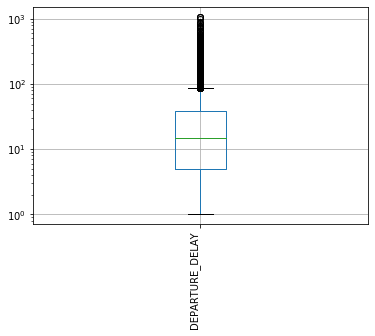

In [46]:
Flights[Flights.DEPARTURE_DELAY >0].boxplot(column=["DEPARTURE_DELAY"]).set_yscale('log')
plt.xticks(rotation=90, ha='right')


### Checking for Outliers Using a box plot

The box plot shows that there is an outlier between 10^2 &10^3


An outlier is a data point in a data set that is distant from all other observation.

### Handling outlier

In [ ]:
data = data[data[‘hp’]< Upper_Whisker]

###  I can also use the Z-Score Method to handle the outlier.